# 03. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import src.utils as utils
from ast import literal_eval
from datetime import date, datetime

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = utils.pickle_load('data/processed/train.pkl')
df_train.reset_index(drop = True, inplace= True)
df_train.head()

,tracks_popularity,artist_popularity,duration_ms,explicit,danceability,energy,time_signature,loudness,modality,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,followers,big5_company,days_after_debut,mean_age
0,59,73,263613,non_explicit,0.202,0.670,3,-2.844,major,0.0326,0.5650,0.000001,0.120,0.127,170.777,A#,2575260.0,nan,NaN,NaN
1,58,96,203347,non_explicit,0.628,0.718,4,-3.167,major,0.0886,0.0025,0.000000,0.145,0.507,100.005,B,31623813.0,True,1054.0,26.0
2,61,60,183320,non_explicit,0.757,0.668,4,-2.994,major,0.0348,0.3580,0.000000,0.161,0.818,95.012,C,227406.0,nan,NaN,NaN
3,56,68,193933,non_explicit,0.461,0.316,4,-6.366,major,0.0316,0.8590,0.000000,0.111,0.510,128.924,G#,423546.0,nan,NaN,NaN
4,58,62,205773,non_explicit,0.474,0.229,4,-9.470,major,0.0329,0.8580,0.000000,0.110,0.289,118.827,A#,117781.0,nan,NaN,NaN


### a. Plot to see the spreading of track and artist popularity in Histogram

The artist and track popularity seems to follow normality distribution, no long tail in distribution, <br>so there's no need to transform the popularity with logarithmic form.

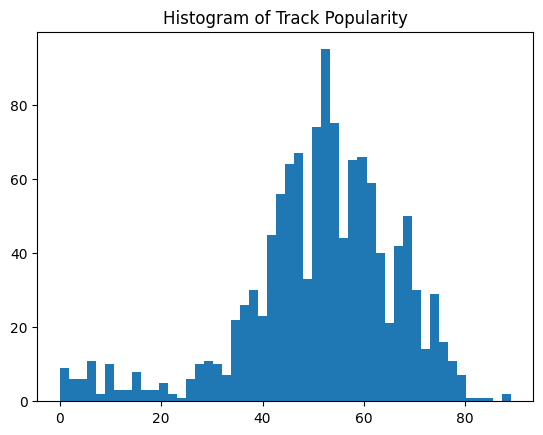

In [3]:
plt.hist(df_train.tracks_popularity, bins = 50)
plt.title("Histogram of Track Popularity")
plt.show()
#sns.histplot(df_train.artist_popularity, bins = 50)

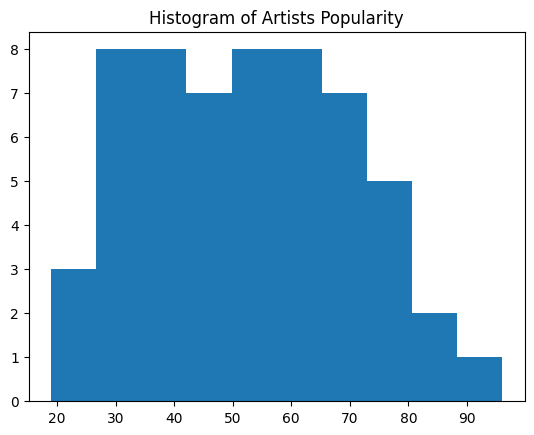

In [4]:
plt.hist(df_train.artist_popularity.unique(), bins = 10)
plt.title("Histogram of Artists Popularity")
plt.show()

### b. Heatmap of Correlation Plot between Dependent and Independent Variables

Divided into two heatmap, the first one is correlation between `track_popularity` and `main_features` of track (popularity, followers, days from debut, and age when track was released). The second one is correlation between `track_popularity` and the musicality feature of the track.

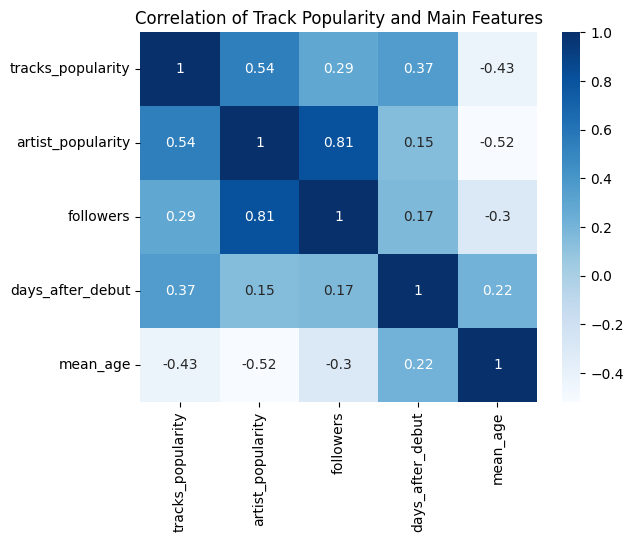

In [6]:
main_features=['tracks_popularity', 'artist_popularity', 'followers', 'days_after_debut', 'mean_age']
corr = df_train[main_features].corr()

ax = plt.axes()
corr_plot = sns.heatmap(corr, cmap="Blues", annot=True, ax = ax)
ax.set_title('Correlation of Track Popularity and Main Features')
plt.show()


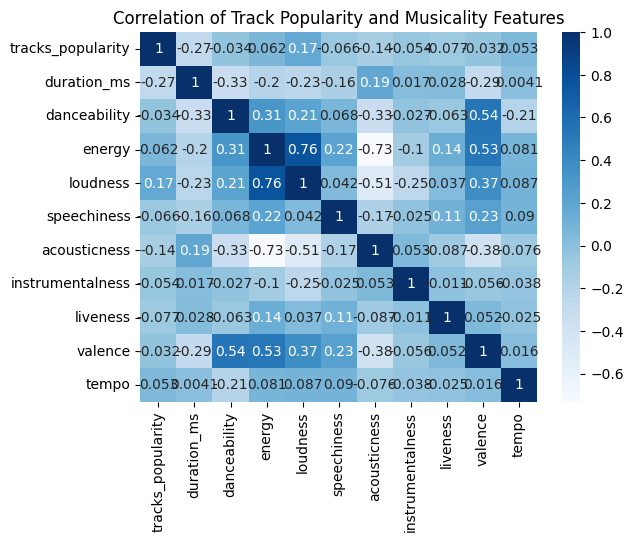

In [8]:
musicality_feature = ['tracks_popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
corr = df_train[musicality_feature].corr()

ax = plt.axes()
corr_plot = sns.heatmap(corr, cmap="Blues", annot=True, ax = ax)
ax.set_title('Correlation of Track Popularity and Musicality Features')
plt.show()

### EDA categorical variables

- For `explicit` and `time_signature` variables, the explicit tracks is just a small portion so it could be dropped as the independent variable
- For `big5_company`, `key`, `modality` variable it gonna be used as independent variables, because there's slightly difference in tracks_popularity spread

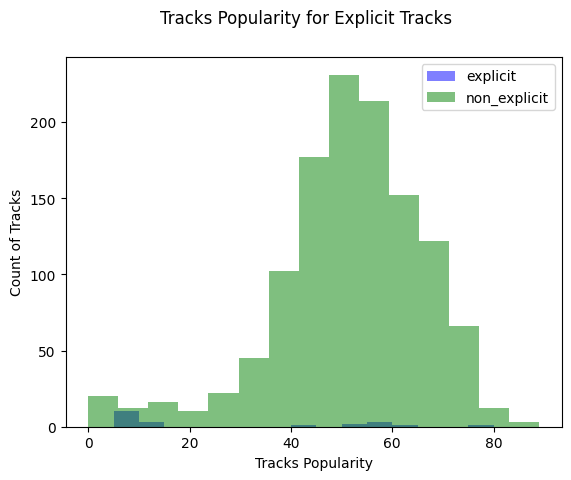

In [9]:
fig, ax = plt.subplots()

ax.hist(df_train[df_train["explicit"]=="explicit"]["tracks_popularity"], bins=15, alpha=0.5, color="blue", label="explicit")
ax.hist(df_train[df_train["explicit"]=="non_explicit"]["tracks_popularity"], bins=15, alpha=0.5, color="green", label="non_explicit")

ax.set_xlabel("Tracks Popularity")
ax.set_ylabel("Count of Tracks")

fig.suptitle("Tracks Popularity for Explicit Tracks")

ax.legend();

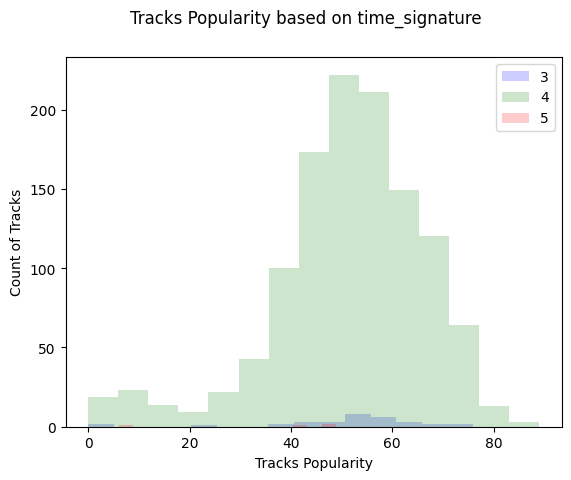

In [11]:
# Tracks Popularity based on time_signature
fig, ax = plt.subplots()

ax.hist(df_train[df_train["time_signature"]=="3"]["tracks_popularity"], bins=15, alpha=0.2, color="blue", label="3")
ax.hist(df_train[df_train["time_signature"]=="4"]["tracks_popularity"], bins=15, alpha=0.2, color="green", label="4")
ax.hist(df_train[df_train["time_signature"]=="5"]["tracks_popularity"], bins=15, alpha=0.2, color="red", label="5")

ax.set_xlabel("Tracks Popularity")
ax.set_ylabel("Count of Tracks")

fig.suptitle("Tracks Popularity based on time_signature")

ax.legend();

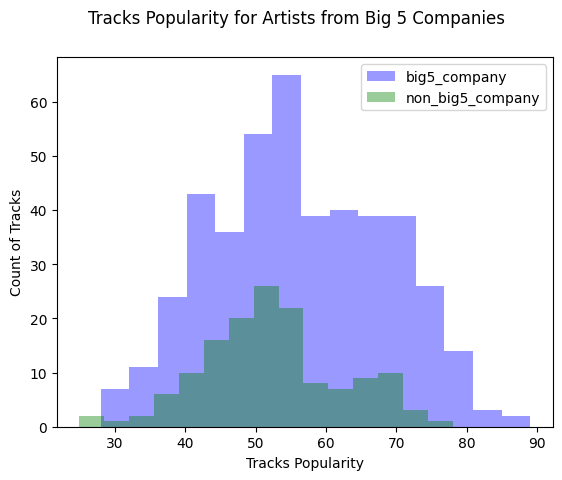

In [12]:
## EDA categorical variables based on company
fig, ax = plt.subplots()

ax.hist(df_train[df_train["big5_company"]=="True"]["tracks_popularity"], bins=15, alpha=0.4, color="blue", label="big5_company")
ax.hist(df_train[df_train["big5_company"]=="False"]["tracks_popularity"], bins=15, alpha=0.4, color="green", label="non_big5_company")

ax.set_xlabel("Tracks Popularity")
ax.set_ylabel("Count of Tracks")

fig.suptitle("Tracks Popularity for Artists from Big 5 Companies")

ax.legend();

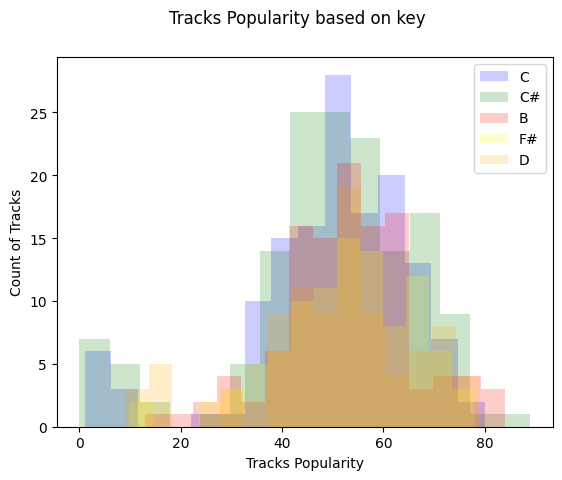

In [13]:
#Tracks Popularity based on key

fig, ax = plt.subplots()

ax.hist(df_train[df_train["key"]=="C"]["tracks_popularity"], bins=15, alpha=0.2, color="blue", label="C")
ax.hist(df_train[df_train["key"]=="C#"]["tracks_popularity"], bins=15, alpha=0.2, color="green", label="C#")
ax.hist(df_train[df_train["key"]=="B"]["tracks_popularity"], bins=15, alpha=0.2, color="red", label="B")
ax.hist(df_train[df_train["key"]=="F#"]["tracks_popularity"], bins=15, alpha=0.2, color="yellow", label="F#")
ax.hist(df_train[df_train["key"]=="D"]["tracks_popularity"], bins=15, alpha=0.2, color="orange", label="D")

ax.set_xlabel("Tracks Popularity")
ax.set_ylabel("Count of Tracks")

fig.suptitle("Tracks Popularity based on key")

ax.legend();

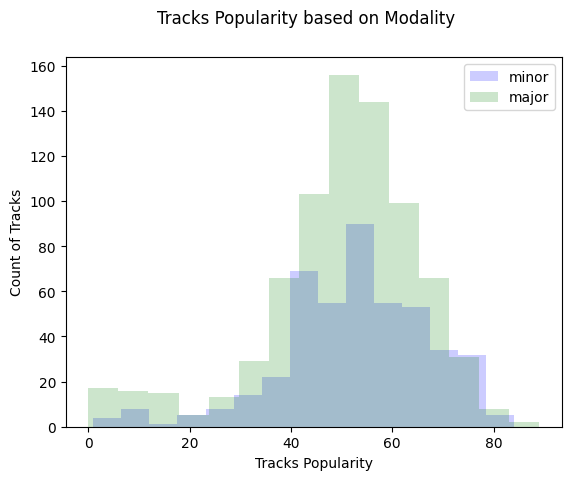

In [14]:
#Tracks Popularity based on modality

fig, ax = plt.subplots()

ax.hist(df_train[df_train["modality"]=="minor"]["tracks_popularity"], bins=15, alpha=0.2, color="blue", label="minor")
ax.hist(df_train[df_train["modality"]=="major"]["tracks_popularity"], bins=15, alpha=0.2, color="green", label="major")

ax.set_xlabel("Tracks Popularity")
ax.set_ylabel("Count of Tracks")

fig.suptitle("Tracks Popularity based on Modality")

ax.legend();